In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from warnings import filterwarnings
filterwarnings(action="ignore")

* Source
     - http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

---------------------------------------
### Dataset characteristics
--------------------------------------
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	

In [103]:
df = pd.read_csv('../../Data/Bike-Sharing-Dataset/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [104]:
##  Preprocessing

df.season = df.season.map({1:"springer",2:"summer", 3:"fall", 4:"winter"})
df.yr = df.yr.map({0: 2011, 1:2012})

# df.weathersit = df.weathersit.map({1: "Clear, Few clouds, Partly cloudy, Partly cloudy", 2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
# , 3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
# 4:" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})
# df.temp =  df.temp * 41
# df.hum = df.hum *100
df.drop(["instant","atemp","casual","registered"],axis=1,inplace=True)

In [105]:
# df.drop("cnt",axis=1)
df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']] = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']].astype("str")
df.dteday = pd.to_datetime(df.dteday)
df.set_index('dteday',inplace=True)
X = pd.get_dummies(df.drop("cnt",axis=1))
y= df.cnt

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### EDA

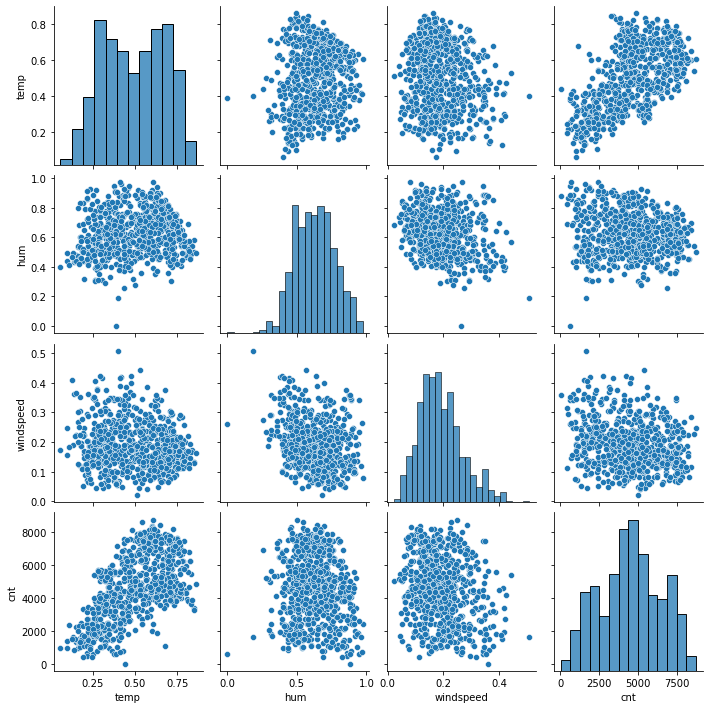

In [107]:

sns.pairplot(df);

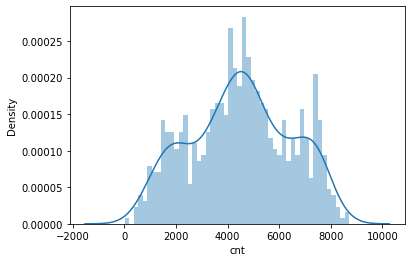

In [108]:
sns.distplot(df.cnt,bins=50);

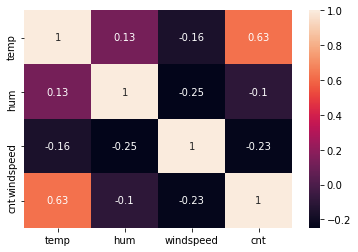

In [109]:

sns.heatmap(df.corr(),annot=True);

In [110]:
from sklearn.linear_model import LinearRegression


In [111]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [138]:

print("Intercept : ",lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Intercept :  4092594098954543.0


,Coefficient
temp,5.179971e+03
hum,-1.365830e+03
windspeed,-2.412330e+03
season_fall,3.983240e+14
season_springer,3.983240e+14
season_summer,3.983240e+14
season_winter,3.983240e+14
yr_2011,1.770729e+15
yr_2012,1.770729e+15
mnth_1,-1.258961e+15


<AxesSubplot:>

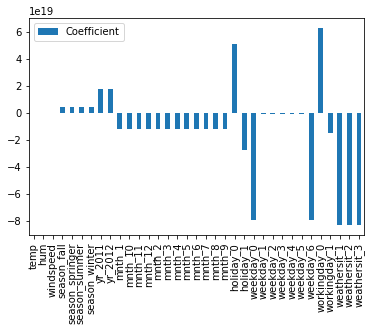

In [154]:
coeff_df.plot(kind="bar")

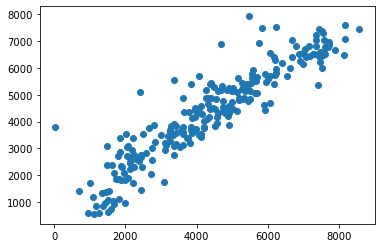

In [133]:
# Predictions from our model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

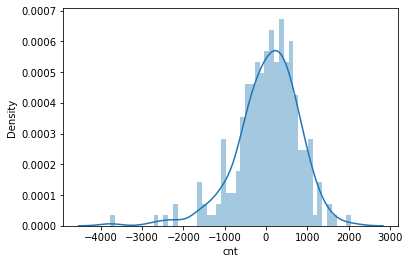

In [134]:
## Residual Histogram
sns.distplot((y_test-predictions),bins=50);

In [135]:
# Evaluation metrics 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 575.0206611570248
MSE: 586959.561983471
RMSE: 766.1328618349894


In [136]:
df.cnt.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

## xai 

In [162]:
from interpret.glassbox import LinearRegression
from interpret import show
ilr = LinearRegression()
ilr.fit(X_train,y_train)


In [163]:
lr_global =ilr.explain_global()
show(lr_global)

<!-- http://127.0.0.1:7001/3018526713360/ -->

In [179]:
lr_local = ilr.explain_local(X_test,y_test)
show(lr_local)

<!-- http://127.0.0.1:7001/3018002278000/ -->